In [33]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [34]:
def display(img,cmap=None):
    fig = plt.figure(figsize=(10,8))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap=cmap)

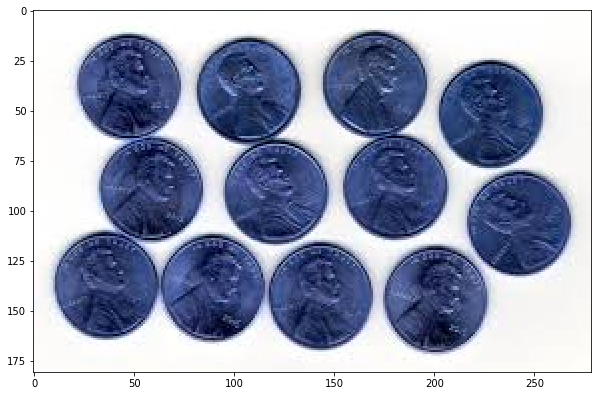

In [35]:
img = cv2.imread('coins.jpg')
display(img)

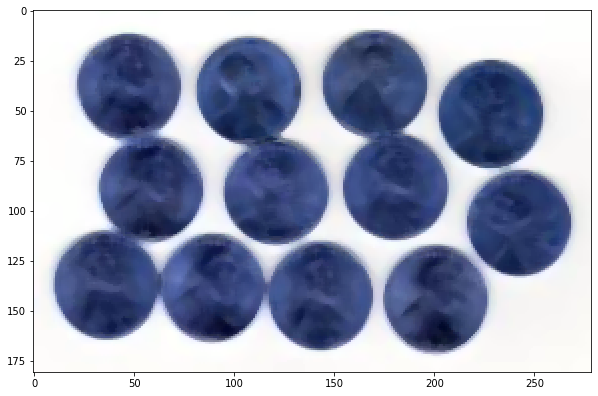

In [36]:
blur_img = cv2.medianBlur(img,5)
display(blur_img)

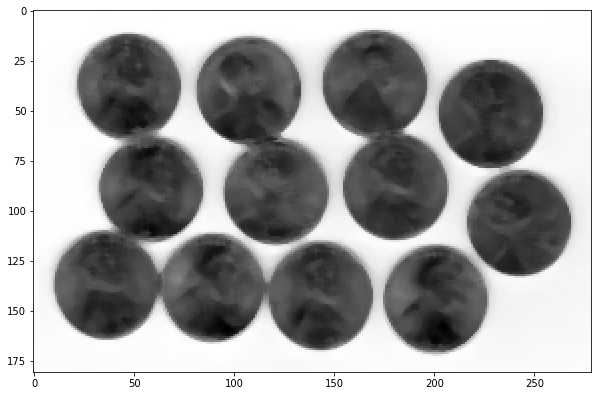

In [37]:
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)
display(gray_img,cmap = 'gray')

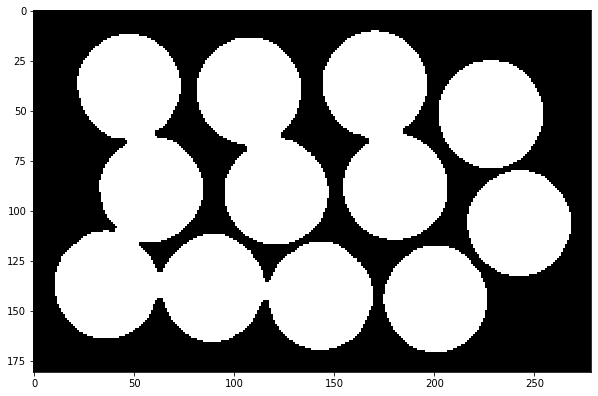

In [38]:
ret,thresh = cv2.threshold(gray_img,150,255,cv2.THRESH_BINARY_INV)
display(thresh,cmap = 'gray')

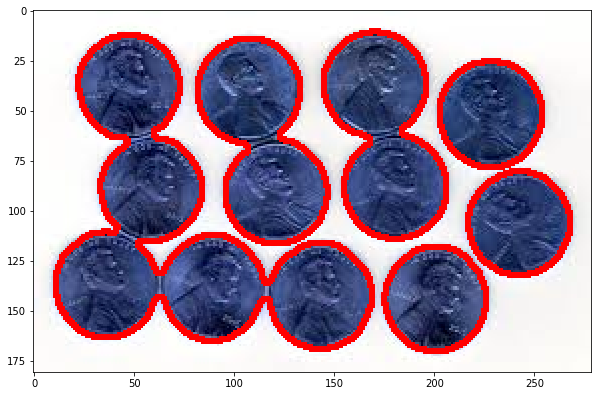

In [39]:
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),2)
display(img)

# Watershed Algorithm

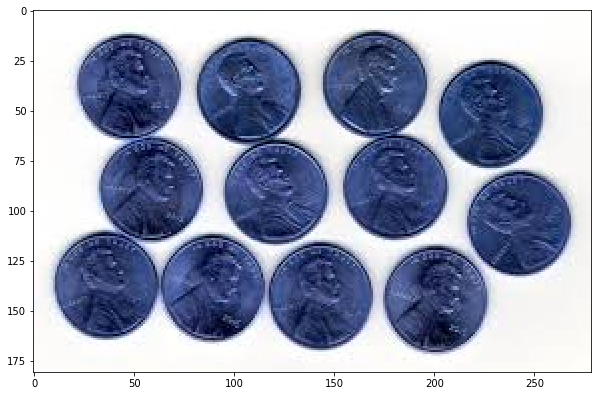

In [40]:
img = cv2.imread('coins.jpg')
display(img)

In [41]:
blur_img = cv2.medianBlur(img,5)
gray_img = cv2.cvtColor(blur_img,cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray_img,0,255,cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)


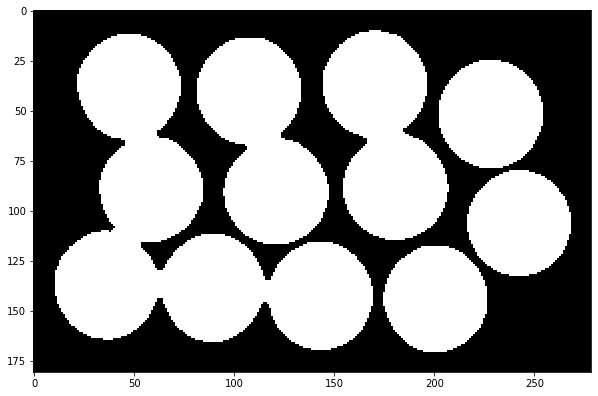

In [42]:
display(thresh,cmap = 'gray')

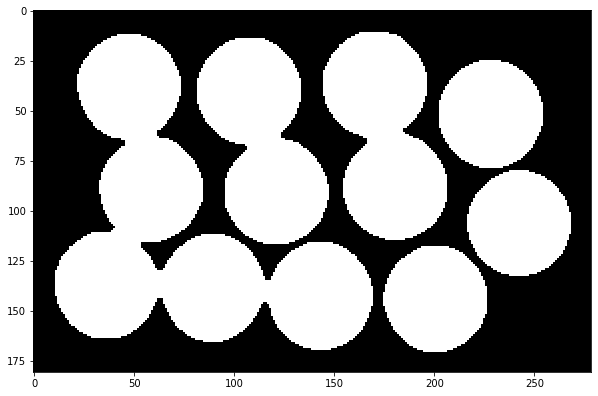

In [43]:
kernel = np.ones((3,3),np.uint8)
opened = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel,iterations = 3)
display(opened,cmap = 'gray')

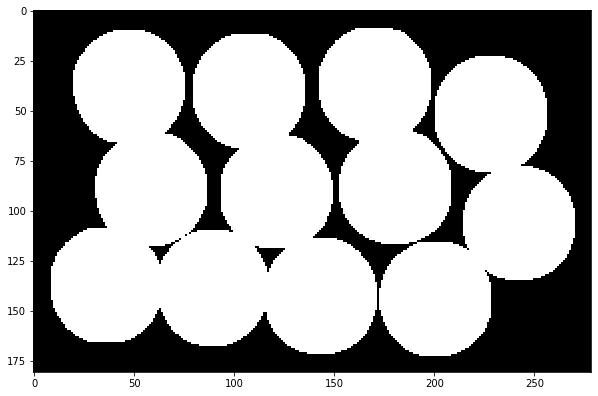

In [44]:
sure_bg = cv2.dilate(opened,kernel,iterations = 2)
display(sure_bg,cmap = 'gray')

In [45]:
dist_transform = cv2.distanceTransform(opened,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.7*dist_transform.max(),255,0)

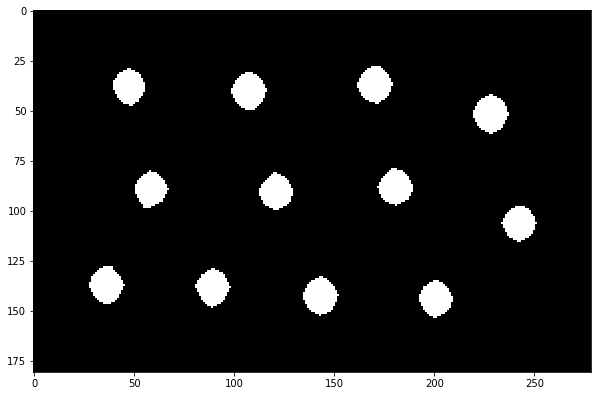

In [46]:
display(sure_fg,cmap = 'gray')

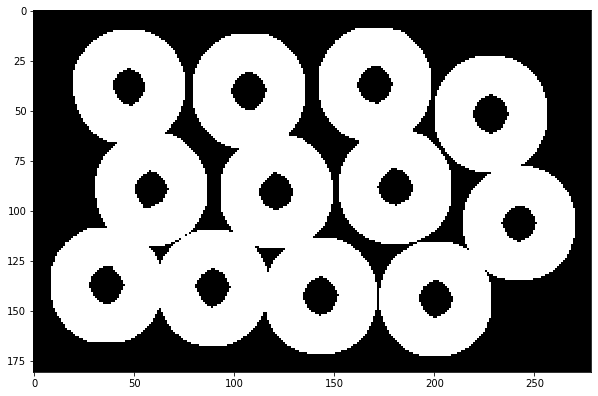

In [47]:
sure_fg = np.uint8(sure_fg)
sure_bg = np.uint8(sure_bg)
unknown = sure_bg - sure_fg
display(unknown,cmap = 'gray')


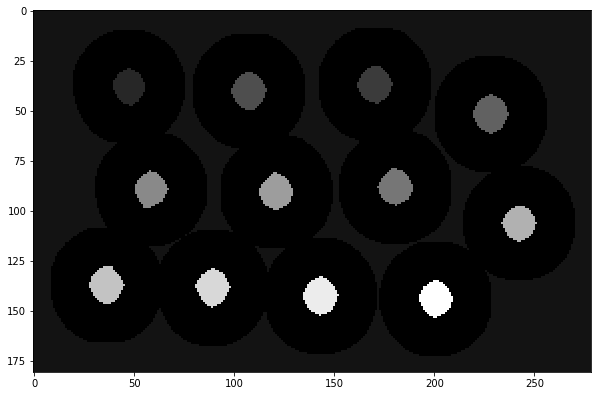

In [48]:
ret,markers = cv2.connectedComponents(sure_fg)
markers  = markers+1
markers[unknown == 255] = 0
display(markers,cmap = 'gray')

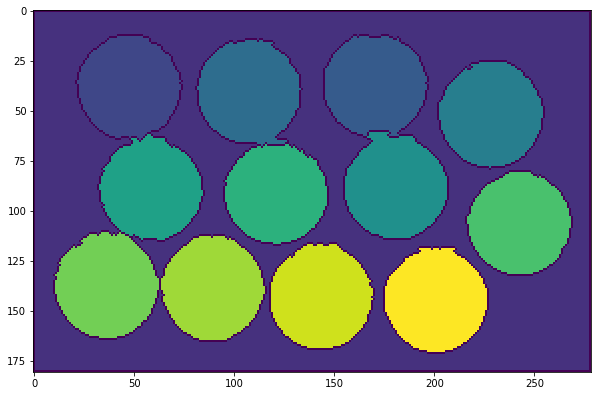

In [49]:
result = cv2.watershed(img,markers)
display(result)

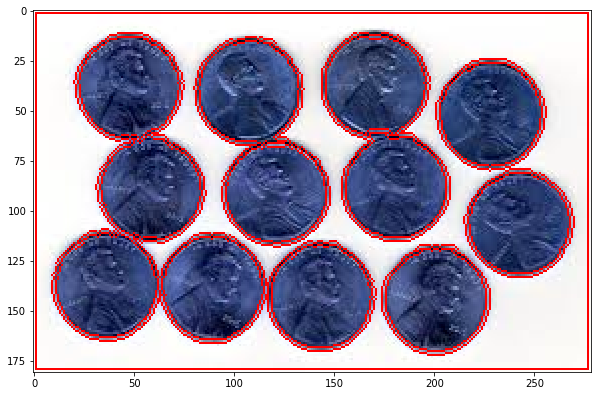

In [50]:
contours,hierarchy  = cv2.findContours(result,cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(img,contours,i,(255,0,0),1)
display(img)